In [1]:
import pandas as pd
import numpy as np 
import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer as stemmer
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import re

from collections import Counter 
import spacy
from IPython.display import clear_output

from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)  

In [3]:
%cd desktop

C:\Users\VIJESH\desktop


In [4]:
df=pd.read_csv("Jbl_reviews.csv")

In [5]:
df.head() #data exploration

Jbl_review  \
0  I am an audiophile and have a huge collection of speakers including Tagg Sonic Angle 1, Logitech x300/Z625/Z333/F&D T200X, Tribit x Sound Go JBL Flip 21. Build Quality 9/10 - I am deducting 1 point for no Carabiner or string and the very bold TAGG Logo2. Bluetooth: Connects automatically and in my lawn I get bluetooth connectivity like Tribit of 60ft 10/103. Sound:  I use the firestick as feed when at home and the sound is melodious with no distortion at 90% Volume....The amplifiers of most mobiles are not upto the mark. I will give TAGG 9 for High notes,10 for mids & 7 for bass. For watching movies/TV serials the clarity is better than even the THX certified  625. TAGG is now my favorite speaker for TV/walks/car. However Logitech x300 is better for heavy metal/Rock  I improvise by making TAGG stand with half face of speakers/bass radiator to obtain a better sound while listening to english music4. After trying many speakers like NU Skream 1/2. XE 50. JBL clip2, UE Roll 2, Amazon BSK10, x-mini soundbar etc ...I have found TAGG Sonic Angle 1 as the best portable/IPX5 speaker with a sound signature that can be termed as music maestro...TWS is a boon and so is that I can stop music and restart at the touch of a button in my car that I can't do with Logitech x300\n                                                                                                                                                                                                                                                  
1   Just Awesome product... Must buy than others...the product is much above the expectations...About sound quality...excellent crisp &clear sound.. Addictive...Battery life...I'm using this for 2 months almost... Nd still at one charge it gives meMin 8 hrs nd as I counted first ND now at its best 10-11 Hours... I've got...Very easy to carry... Almost everywhere u can carry... ND it's a beast in the pocket actually..Basss is just also best than any at this price...  Bcaz as its bass is feeling better nd better as days are passing ...it feels like it is improving itself... 😅 just perfectBuild quality is just faking hardcore... As it fell from almost 10 feet directly on the floor... ND just sound as stone wrapped in rubber coat... Nothing happened... Sound... Bass... Everything as it is at its best... (it fell bcaz it was jumping bcaz of bass) I am unable to upload video or I would have shown this dancing speaker...I'm just Enjoying my money getting paid daily...\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
2  Purchased this on 30th august and have been using it since last 10 days. My last MI bluetooth speaker got damaged and sound was getting distorted so i needed a good replacement. A little bit overpriced compared to its competitors like portronics, boat etc but the quality is premium and sound very nice. Base is really good compared to the size of the speakers as the passive radiator provided at the bottom of the speakers does a good job. sound clarity is great and yes the sound level is enough to fill a decent size room. Of-course don't expect a party sound level.  Aux and USB Connectivity is from back and easy. I am using it as external speaker for my LED TV and this has been doing a good job. The battery back is as good as it is claimed. Overall am satisfied, have registered the product online and have got 18 months warranty confirmation on mail as well. :)\n                                                         

In [6]:
df.shape

(7335, 2)

## This function removes punctuation,does stemming and returns the cleaned reviews

In [7]:
def clean(row):
    s=row['Jbl_review']
    stop=stopwords.words('english')
    p=string.punctuation  
    ps=stemmer()
    s=s.lower()
    a_clean=[i for i in s if i not in p]   #removes punctuation
    a__clean=''.join(a_clean)
    c=a__clean.split()
    clean=[i for i in c if i not in stop]  #removes stopwords
    n_stem=[ps.stem(i) for i in clean]     #does stemming (suffix, prefix)
    d=' '.join(n_stem)
    cleaned=re.sub(' +',' ',d)          #removes extra spaces
    return cleaned
    

In [8]:
df['cleaned_review']=df.apply(lambda row:clean(row),axis=1)

In [9]:
df.head()

Jbl_review  \
0  I am an audiophile and have a huge collection of speakers including Tagg Sonic Angle 1, Logitech x300/Z625/Z333/F&D T200X, Tribit x Sound Go JBL Flip 21. Build Quality 9/10 - I am deducting 1 point for no Carabiner or string and the very bold TAGG Logo2. Bluetooth: Connects automatically and in my lawn I get bluetooth connectivity like Tribit of 60ft 10/103. Sound:  I use the firestick as feed when at home and the sound is melodious with no distortion at 90% Volume....The amplifiers of most mobiles are not upto the mark. I will give TAGG 9 for High notes,10 for mids & 7 for bass. For watching movies/TV serials the clarity is better than even the THX certified  625. TAGG is now my favorite speaker for TV/walks/car. However Logitech x300 is better for heavy metal/Rock  I improvise by making TAGG stand with half face of speakers/bass radiator to obtain a better sound while listening to english music4. After trying many speakers like NU Skream 1/2. XE 50. JBL clip2, UE Roll 2, Amazon BSK10, x-mini soundbar etc ...I have found TAGG Sonic Angle 1 as the best portable/IPX5 speaker with a sound signature that can be termed as music maestro...TWS is a boon and so is that I can stop music and restart at the touch of a button in my car that I can't do with Logitech x300\n                                                                                                                                                                                                                                                  
1   Just Awesome product... Must buy than others...the product is much above the expectations...About sound quality...excellent crisp &clear sound.. Addictive...Battery life...I'm using this for 2 months almost... Nd still at one charge it gives meMin 8 hrs nd as I counted first ND now at its best 10-11 Hours... I've got...Very easy to carry... Almost everywhere u can carry... ND it's a beast in the pocket actually..Basss is just also best than any at this price...  Bcaz as its bass is feeling better nd better as days are passing ...it feels like it is improving itself... 😅 just perfectBuild quality is just faking hardcore... As it fell from almost 10 feet directly on the floor... ND just sound as stone wrapped in rubber coat... Nothing happened... Sound... Bass... Everything as it is at its best... (it fell bcaz it was jumping bcaz of bass) I am unable to upload video or I would have shown this dancing speaker...I'm just Enjoying my money getting paid daily...\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
2  Purchased this on 30th august and have been using it since last 10 days. My last MI bluetooth speaker got damaged and sound was getting distorted so i needed a good replacement. A little bit overpriced compared to its competitors like portronics, boat etc but the quality is premium and sound very nice. Base is really good compared to the size of the speakers as the passive radiator provided at the bottom of the speakers does a good job. sound clarity is great and yes the sound level is enough to fill a decent size room. Of-course don't expect a party sound level.  Aux and USB Connectivity is from back and easy. I am using it as external speaker for my LED TV and this has been doing a good job. The battery back is as good as it is claimed. Overall am satisfied, have registered the product online and have got 18 months warranty confirmation on mail as well. :)\n                                                         

## common words using word cloud

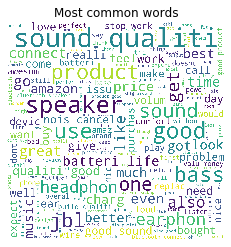

In [10]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, stopwords=set(stopwords.words('english')), background_color='white')
wordcloud = wordcloud.generate(' '.join(df['cleaned_review'].tolist()))
plt.imshow(wordcloud)
plt.title("Most common words")
plt.axis('off')
plt.show()

In [11]:
df['rating']  #rating needs to cleaned 

0       5.0 out of 5 stars
1       5.0 out of 5 stars
2       5.0 out of 5 stars
3       5.0 out of 5 stars
4       5.0 out of 5 stars
               ...        
7330    4.0 out of 5 stars
7331    2.0 out of 5 stars
7332    2.0 out of 5 stars
7333    2.0 out of 5 stars
7334    1.0 out of 5 stars
Name: rating, Length: 7335, dtype: object

In [12]:
def rat(row):
    string=row['rating']
    string.split()
    return float(string[:3]) #returns the rating in integer datatype

In [13]:
df['rating']=df.apply(lambda row:rat(row),axis=1)

In [14]:
df.head()

Jbl_review  \
0  I am an audiophile and have a huge collection of speakers including Tagg Sonic Angle 1, Logitech x300/Z625/Z333/F&D T200X, Tribit x Sound Go JBL Flip 21. Build Quality 9/10 - I am deducting 1 point for no Carabiner or string and the very bold TAGG Logo2. Bluetooth: Connects automatically and in my lawn I get bluetooth connectivity like Tribit of 60ft 10/103. Sound:  I use the firestick as feed when at home and the sound is melodious with no distortion at 90% Volume....The amplifiers of most mobiles are not upto the mark. I will give TAGG 9 for High notes,10 for mids & 7 for bass. For watching movies/TV serials the clarity is better than even the THX certified  625. TAGG is now my favorite speaker for TV/walks/car. However Logitech x300 is better for heavy metal/Rock  I improvise by making TAGG stand with half face of speakers/bass radiator to obtain a better sound while listening to english music4. After trying many speakers like NU Skream 1/2. XE 50. JBL clip2, UE Roll 2, Amazon BSK10, x-mini soundbar etc ...I have found TAGG Sonic Angle 1 as the best portable/IPX5 speaker with a sound signature that can be termed as music maestro...TWS is a boon and so is that I can stop music and restart at the touch of a button in my car that I can't do with Logitech x300\n                                                                                                                                                                                                                                                  
1   Just Awesome product... Must buy than others...the product is much above the expectations...About sound quality...excellent crisp &clear sound.. Addictive...Battery life...I'm using this for 2 months almost... Nd still at one charge it gives meMin 8 hrs nd as I counted first ND now at its best 10-11 Hours... I've got...Very easy to carry... Almost everywhere u can carry... ND it's a beast in the pocket actually..Basss is just also best than any at this price...  Bcaz as its bass is feeling better nd better as days are passing ...it feels like it is improving itself... 😅 just perfectBuild quality is just faking hardcore... As it fell from almost 10 feet directly on the floor... ND just sound as stone wrapped in rubber coat... Nothing happened... Sound... Bass... Everything as it is at its best... (it fell bcaz it was jumping bcaz of bass) I am unable to upload video or I would have shown this dancing speaker...I'm just Enjoying my money getting paid daily...\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
2  Purchased this on 30th august and have been using it since last 10 days. My last MI bluetooth speaker got damaged and sound was getting distorted so i needed a good replacement. A little bit overpriced compared to its competitors like portronics, boat etc but the quality is premium and sound very nice. Base is really good compared to the size of the speakers as the passive radiator provided at the bottom of the speakers does a good job. sound clarity is great and yes the sound level is enough to fill a decent size room. Of-course don't expect a party sound level.  Aux and USB Connectivity is from back and easy. I am using it as external speaker for my LED TV and this has been doing a good job. The battery back is as good as it is claimed. Overall am satisfied, have registered the product online and have got 18 months warranty confirmation on mail as well. :)\n                                                         

## rating categories

In [15]:
def RatingCat(row):
    if row['rating']<2:     # if the rating is less than 2 then it is negative
        return "negative"
    elif row['rating']>2:   #if the rating is higher than 2 then it is positive
        return "positive"
    else:
        return "neutral"

In [16]:
df['category']=df.apply(lambda row:RatingCat(row),axis=1)

In [17]:
df.head()

Jbl_review  \
0  I am an audiophile and have a huge collection of speakers including Tagg Sonic Angle 1, Logitech x300/Z625/Z333/F&D T200X, Tribit x Sound Go JBL Flip 21. Build Quality 9/10 - I am deducting 1 point for no Carabiner or string and the very bold TAGG Logo2. Bluetooth: Connects automatically and in my lawn I get bluetooth connectivity like Tribit of 60ft 10/103. Sound:  I use the firestick as feed when at home and the sound is melodious with no distortion at 90% Volume....The amplifiers of most mobiles are not upto the mark. I will give TAGG 9 for High notes,10 for mids & 7 for bass. For watching movies/TV serials the clarity is better than even the THX certified  625. TAGG is now my favorite speaker for TV/walks/car. However Logitech x300 is better for heavy metal/Rock  I improvise by making TAGG stand with half face of speakers/bass radiator to obtain a better sound while listening to english music4. After trying many speakers like NU Skream 1/2. XE 50. JBL clip2, UE Roll 2, Amazon BSK10, x-mini soundbar etc ...I have found TAGG Sonic Angle 1 as the best portable/IPX5 speaker with a sound signature that can be termed as music maestro...TWS is a boon and so is that I can stop music and restart at the touch of a button in my car that I can't do with Logitech x300\n                                                                                                                                                                                                                                                  
1   Just Awesome product... Must buy than others...the product is much above the expectations...About sound quality...excellent crisp &clear sound.. Addictive...Battery life...I'm using this for 2 months almost... Nd still at one charge it gives meMin 8 hrs nd as I counted first ND now at its best 10-11 Hours... I've got...Very easy to carry... Almost everywhere u can carry... ND it's a beast in the pocket actually..Basss is just also best than any at this price...  Bcaz as its bass is feeling better nd better as days are passing ...it feels like it is improving itself... 😅 just perfectBuild quality is just faking hardcore... As it fell from almost 10 feet directly on the floor... ND just sound as stone wrapped in rubber coat... Nothing happened... Sound... Bass... Everything as it is at its best... (it fell bcaz it was jumping bcaz of bass) I am unable to upload video or I would have shown this dancing speaker...I'm just Enjoying my money getting paid daily...\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
2  Purchased this on 30th august and have been using it since last 10 days. My last MI bluetooth speaker got damaged and sound was getting distorted so i needed a good replacement. A little bit overpriced compared to its competitors like portronics, boat etc but the quality is premium and sound very nice. Base is really good compared to the size of the speakers as the passive radiator provided at the bottom of the speakers does a good job. sound clarity is great and yes the sound level is enough to fill a decent size room. Of-course don't expect a party sound level.  Aux and USB Connectivity is from back and easy. I am using it as external speaker for my LED TV and this has been doing a good job. The battery back is as good as it is claimed. Overall am satisfied, have registered the product online and have got 18 months warranty confirmation on mail as well. :)\n                                                         

Text(0.5, 1.0, 'Distribution of Reviews Category')

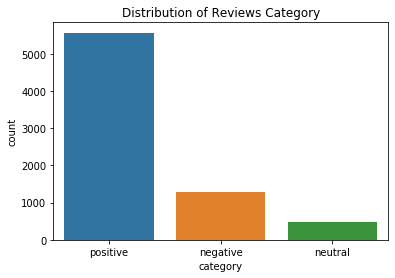

In [18]:
sns.countplot(df['category']).set_title("Distribution of Reviews Category")   #distribution of the reviews

In [19]:
positive_reviews=df.loc[df['category']=='positive','cleaned_review'].tolist() #slicing the positive reviews
negative_reviews=df.loc[df['category']=='negative','cleaned_review'].tolist() #slicing the negative reviews

In [20]:
len(positive_reviews)

5566

In [21]:
len(negative_reviews)

1297

In [22]:
def commonwords(review,top=30):
    reviews="".join(review)
    tokenised_reviews=reviews.split(" ")
    
    freq_counter=Counter(tokenised_reviews) #counts the no of occurances in the list
    return freq_counter.most_common(top)

In [23]:
top_30_positive_review_words=commonwords(positive_reviews,30)

In [24]:
top_30_positive_review_words #top reviews

[('sound', 3417),
 ('qualiti', 2742),
 ('good', 2580),
 ('product', 1982),
 ('bass', 1676),
 ('speaker', 1633),
 ('jbl', 1562),
 ('use', 1358),
 ('one', 969),
 ('batteri', 929),
 ('connect', 837),
 ('price', 822),
 ('also', 780),
 ('work', 747),
 ('like', 734),
 ('get', 716),
 ('bluetooth', 692),
 ('buy', 678),
 ('earphon', 652),
 ('great', 642),
 ('music', 633),
 ('headphon', 611),
 ('go', 609),
 ('volum', 583),
 ('ear', 563),
 ('time', 554),
 ('better', 537),
 ('dont', 535),
 ('best', 529),
 ('charg', 520)]

In [25]:
top_30_negative_review_words=commonwords(negative_reviews,30)

In [26]:
top_30_negative_review_words

[('sound', 715),
 ('qualiti', 647),
 ('product', 575),
 ('good', 539),
 ('jbl', 457),
 ('bass', 365),
 ('use', 362),
 ('work', 285),
 ('one', 280),
 ('earphon', 241),
 ('speaker', 228),
 ('buy', 214),
 ('month', 209),
 ('ear', 198),
 ('like', 190),
 ('connect', 187),
 ('get', 186),
 ('price', 183),
 ('batteri', 181),
 ('also', 171),
 ('headphon', 171),
 ('even', 170),
 ('time', 170),
 ('servic', 164),
 ('dont', 155),
 ('music', 141),
 ('go', 141),
 ('bluetooth', 140),
 ('volum', 136),
 ('better', 133)]

In [27]:
neg_words=[val[0] for val in top_30_negative_review_words]
pos_words=[val[0] for val in top_30_positive_review_words]

set(neg_words) - set(pos_words) #set of words present only in negative reviews

{'even', 'month', 'servic'}

In [28]:
set(pos_words) - set(neg_words) #set of words present only positive reviews

{'best', 'charg', 'great'}

In [29]:
def plotCommonWords(reviews,top=50,title="Positive Review",color="blue",axis=None):
    top_words=commonwords(reviews,top=top)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(top))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(top))

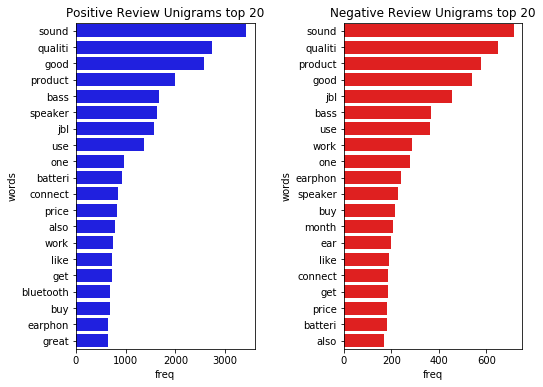

In [30]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8,6 ## Sets the heigth and width of image


fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5) #Adjusts the space between the two plots
plotCommonWords(positive_reviews,20,"Positive Review Unigrams",axis=ax[0])  #displays the top 20 words in positive reviews

plotCommonWords(negative_reviews,20,"Negative Review Unigrams",color="red",axis=ax[1])#displays the top 20 words in negative reviews


## Bigrams

In [31]:
def generateNGram(text,n=2):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]   

In [32]:
positive_reviews_bigrams=[" ".join(generateNGram(review)) for review in positive_reviews]
negative_reviews_bigrams=[" ".join(generateNGram(review)) for review in negative_reviews]


In [33]:
top_20_positive_bigrams=commonwords(positive_reviews_bigrams,top=20)
top_20_positive_bigrams

[('sound_qualiti', 1131),
 ('batteri_life', 352),
 ('qualiti_good', 291),
 ('nois_cancel', 228),
 ('good_sound', 203),
 ('build_qualiti', 195),
 ('bluetooth_speaker', 193),
 ('stop_work', 172),
 ('bluetooth_connect', 153),
 ('batteri_backup', 137),
 ('price_rang', 137),
 ('qualiti_sound', 128),
 ('good_bass', 125),
 ('also_good', 115),
 ('valu_money', 111),
 ('sound_good', 104),
 ('sound_bar', 102),
 ('bass_good', 100),
 ('good_qualiti', 92),
 ('great_sound', 87)]

In [34]:
top_20_negative_bigrams=commonwords(negative_reviews_bigrams,top=20)

In [35]:
top_20_negative_bigrams

[('sound_qualiti', 266),
 ('stop_work', 84),
 ('batteri_life', 73),
 ('qualiti_good', 63),
 ('nois_cancel', 58),
 ('servic_center', 41),
 ('good_sound', 40),
 ('servic_centr', 32),
 ('bluetooth_connect', 30),
 ('dont_buy', 30),
 ('price_rang', 29),
 ('build_qualiti', 28),
 ('2_month', 27),
 ('clear_sound', 26),
 ('buy_product', 25),
 ('realli_good', 25),
 ('product_good', 25),
 ('good_bass', 24),
 ('one_side', 24),
 ('6_month', 24)]

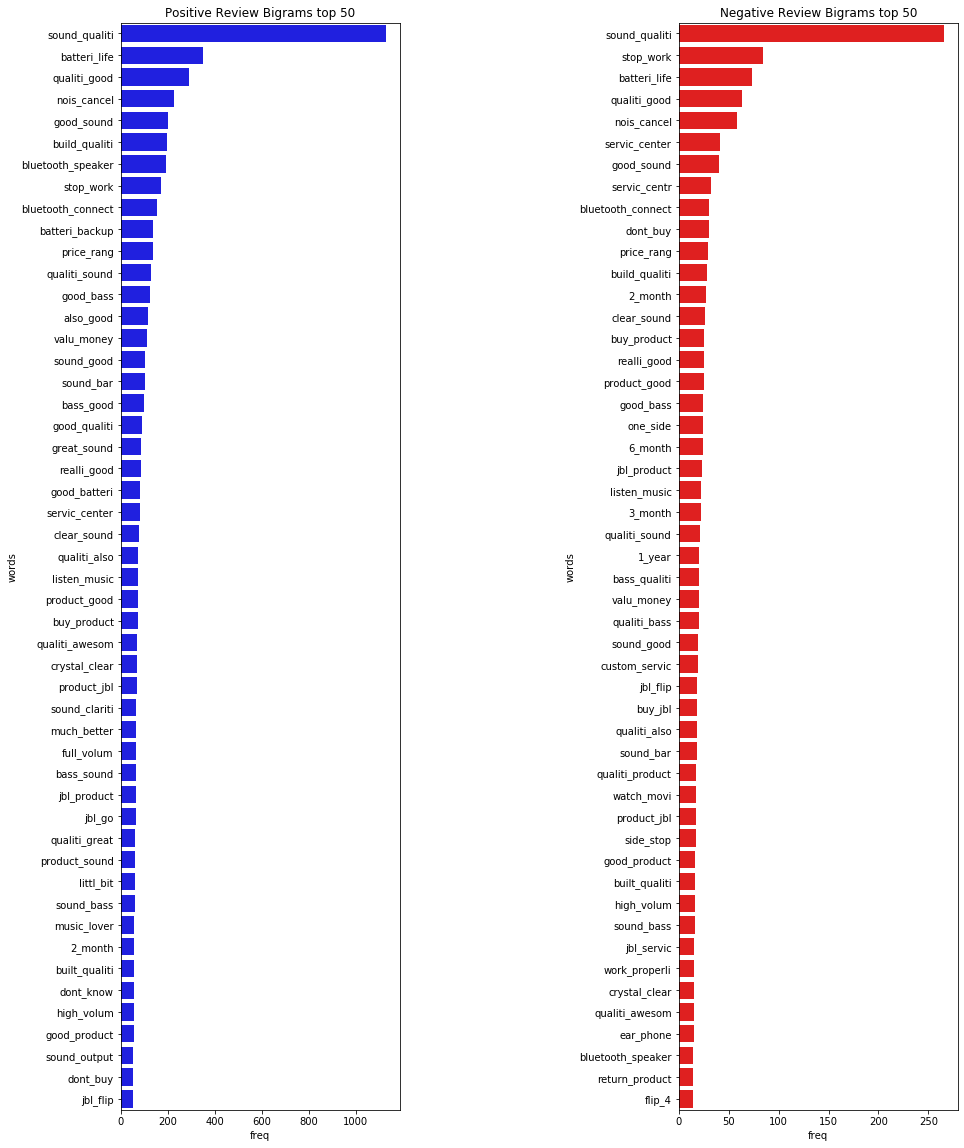

In [36]:
rcParams['figure.figsize'] = 15,20
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1) #Adjusts the space between the two plots
plotCommonWords(positive_reviews_bigrams,50,"Positive Review Bigrams",axis=ax[0])

plotCommonWords(negative_reviews_bigrams,50,"Negative Review Bigrams",color="red",axis=ax[1])

## Trigram

In [37]:
def TriGram(text,n=3):
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams]

In [38]:
positive_reviews_trigrams=[" ".join(TriGram(review)) for review in positive_reviews]
negative_reviews_trigrams=[" ".join(TriGram(review)) for review in negative_reviews]

In [39]:
top_20_positive_trigrams=commonwords(positive_reviews_trigrams,top=20)
top_20_positive_trigrams

[('sound_qualiti_good', 122),
 ('good_sound_qualiti', 87),
 ('sound_qualiti_awesom', 37),
 ('product_sound_qualiti', 35),
 ('sound_qualiti_also', 33),
 ('good_batteri_life', 31),
 ('sound_qualiti_great', 29),
 ('batteri_life_good', 28),
 ('great_sound_qualiti', 28),
 ('qualiti_also_good', 27),
 ('sound_qualiti_amaz', 25),
 ('sound_qualiti_bass', 25),
 ('sound_qualiti_batteri', 24),
 ('batteri_life_also', 24),
 ('stop_work_within', 24),
 ('qualiti_good_bass', 23),
 ('crystal_clear_sound', 22),
 ('qualiti_nois_cancel', 22),
 ('nois_cancel_good', 21),
 ('good_nois_cancel', 21)]

In [40]:
top_20_negative_trigrams=commonwords(negative_reviews_trigrams,top=20)
top_20_negative_trigrams

[('sound_qualiti_good', 26),
 ('good_sound_qualiti', 20),
 ('side_stop_work', 15),
 ('sound_qualiti_bass', 14),
 ('jbl_servic_center', 9),
 ('nois_cancel_good', 9),
 ('jbl_flip_4', 8),
 ('earpiec_stop_work', 7),
 ('month_one_side', 7),
 ('crystal_clear_sound', 7),
 ('l_shape_connector', 7),
 ('sound_qualiti_great', 6),
 ('qualiti_realli_good', 6),
 ('better_sound_qualiti', 6),
 ('sound_qualiti_awesom', 6),
 ('good_batteri_life', 6),
 ('sound_qualiti_best', 6),
 ('batteri_life_good', 6),
 ('piec_stop_work', 6),
 ('1_year_warranti', 6)]

In [41]:
df.head(1)

Jbl_review  \
0  I am an audiophile and have a huge collection of speakers including Tagg Sonic Angle 1, Logitech x300/Z625/Z333/F&D T200X, Tribit x Sound Go JBL Flip 21. Build Quality 9/10 - I am deducting 1 point for no Carabiner or string and the very bold TAGG Logo2. Bluetooth: Connects automatically and in my lawn I get bluetooth connectivity like Tribit of 60ft 10/103. Sound:  I use the firestick as feed when at home and the sound is melodious with no distortion at 90% Volume....The amplifiers of most mobiles are not upto the mark. I will give TAGG 9 for High notes,10 for mids & 7 for bass. For watching movies/TV serials the clarity is better than even the THX certified  625. TAGG is now my favorite speaker for TV/walks/car. However Logitech x300 is better for heavy metal/Rock  I improvise by making TAGG stand with half face of speakers/bass radiator to obtain a better sound while listening to english music4. After trying many speakers like NU Skream 1/2. XE 50. JBL clip2, UE Roll 2, Amazon BSK10, x-mini soundbar etc ...I have found TAGG Sonic Angle 1 as the best portable/IPX5 speaker with a sound signature that can be termed as music maestro...TWS is a boon and so is that I can stop music and restart at the touch of a button in my car that I can't do with Logitech x300\n   

   rating  \
0  5.0      

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    cleaned_review  \
0  audiophil huge collect speaker includ tagg sonic angl 1 logitech x300z625z333fd t200x tribit x sound go jbl flip 21 build qualiti 910 deduct 1 point carabin string bold tagg logo2 bluetooth connect automat lawn get bluetooth connect like tribit 60ft 10103 sound use firestick feed home sound melodi distort 90 volumeth amplifi mobil upto mark give tagg 9 high notes10 mid 7 bass watch moviestv serial clariti better even thx certifi 625 tagg favorit speaker tvwalkscar howev logitech x300 better heavi metalrock improvis make tagg stand half face speakersbass radiat obtain better sound listen english music4 tri mani speaker like nu skream 12 xe 50 jbl clip2 ue roll 2 amazon bsk10 xmini soundbar etc found tagg sonic angl 1 best portableipx5 speaker sound signatur term music maestrotw boon stop music restart touch button car cant logitech x300   

   category  
0  positive

In [42]:
reviews=[review for review in df.cleaned_review]

In [43]:
   
vectorizer = TfidfVectorizer()
tfidf_model=vectorizer.fit_transform(reviews) #tfidf


In [44]:
pd.DataFrame(tfidf_model.toarray(), columns = vectorizer.get_feature_names())

0100  010sound  011019  01973   02  0211201835day  02963285i  031019  \
0     0.0   0.0       0.0     0.0    0.0  0.0            0.0        0.0      
1     0.0   0.0       0.0     0.0    0.0  0.0            0.0        0.0      
2     0.0   0.0       0.0     0.0    0.0  0.0            0.0        0.0      
3     0.0   0.0       0.0     0.0    0.0  0.0            0.0        0.0      
4     0.0   0.0       0.0     0.0    0.0  0.0            0.0        0.0      
...   ...   ...       ...     ...    ...  ...            ...        ...      
7330  0.0   0.0       0.0     0.0    0.0  0.0            0.0        0.0      
7331  0.0   0.0       0.0     0.0    0.0  0.0            0.0        0.0      
7332  0.0   0.0       0.0     0.0    0.0  0.0            0.0        0.0      
7333  0.0   0.0       0.0     0.0    0.0  0.0            0.0        0.0      
7334  0.0   0.0       0.0     0.0    0.0  0.0            0.0        0.0      

      03102019  03230342  03348963  03feb2019   05  0525  0525frequenc  \
0     0.0       0.0       0.0       0.0        0.0  0.0   0.0            
1     0.0       0.0       0.0       0.0        0.0  0.0   0.0            
2     0.0       0.0       0.0       0.0        0.0  0.0   0.0            
3     0.0       0.0       0.0       0.0        0.0  0.0   0.0            
4     0.0       0.0       0.0       0.0        0.0  0.0   0.0            
...   ...       ...       ...       ...        ...  ...   ...            
7330  0.0       0.0       0.0       0.0        0.0  0.0   0.0            
7331  0.0       0.0       0.0       0.0        0.0  0.0   0.0            
7332  0.0       0.0       0.0       0.0        0.0  0.0   0.0            
7333  0.0       0.0       0.0       0.0        0.0  0.0   0.0            
7334  0.0       0.0       0.0       0.0        0.0  0.0   0.0            

      05dont   07   09  0db        10  100  1000  10000  10000r  10001100  \
0     0.0     0.0  0.0  0.0  0.000000  0.0  0.0   0.0    0.0     0.0        
1     0.0     0.0  0.0  0.0  0.059674  0.0  0.0   0.0    0.0     0.0        
2     0.0     0.0  0.0  0.0  0.089504  0.0  0.0   0.0    0.0     0.0        
3     0.0     0.0  0.0  0.0  0.000000  0.0  0.0   0.0    0.0     0.0        
4     0.0     0.0  0.0  0.0  0.000000  0.0  0.0   0.0    0.0     0.0        
...   ...     ...  ...  ...       ...  ...  ...   ...    ...     ...        
7330  0.0     0.0  0.0  0.0  0.000000  0.0  0.0   0.0    0.0     0.0        
7331  0.0     0.0  0.0  0.0  0.000000  0.0  0.0   0.0    0.0     0.0        
7332  0.0     0.0  0.0  0.0  0.000000  0.0  0.0   0.0    0.0     0.0        
7333  0.0     0.0  0.0  0.0  0.000000  0.0  0.0   0.0    0.0     0.0        
7334  0.0     0.0  0.0  0.0  0.000000  0.0  0.0   0.0    0.0     0.0        

      10001200  10001200r  10001500  10002  1000evidson  1000i  1000inr  \
0     0.0       0.0        0.0       0.0    0.0          0.0    0.0       
1     0.0       0.0        0.0       0.0    0.0          0.0    0.0       
2     0.0       0.0        0.0       0.0    0.0          0.0    0.0       
3     0.0       0.0        0.0       0.0    0.0          0.0    0.0       
4     0.0       0.0        0.0       0.0    0.0          0.0    0.0       
...   ...       ...        ...       ...    ...          ...    ...       
7330  0.0       0.0        0.0       0.0    0.0          0.0    0.0       
7331  0.0       0.0        0.0       0.0    0.0          0.0    0.0       
7332  0.0       0.0        0.0       0.0    0.0          0.0    0.0       
7333  0.0       0.0        0.0       0.0    0.0          0.0    0.0       
7334  0.0       0.0        0.0       0.0    0.0          0.0    0.0       

      1000r  1000rupe  1000then  1000w  100100  100200  100clear  100ft  \
0     0.0    0.0       0.0       0.0    0.0     0.0     0.0       0.0     
1     0.0    0.0       0.0       0.0    0.0     0.0     0.0       0.0     
2     0.0    0.0       0.0       0.0    0.0     0.0     0.0       0.0     
3     0.0    0.0       0.0       0.0    0.0     0.0   

In [45]:
print(vectorizer.get_feature_names()) #column names

['0100', '010sound', '011019', '01973', '02', '0211201835day', '02963285i', '031019', '03102019', '03230342', '03348963', '03feb2019', '05', '0525', '0525frequenc', '05dont', '07', '09', '0db', '10', '100', '1000', '10000', '10000r', '10001100', '10001200', '10001200r', '10001500', '10002', '1000evidson', '1000i', '1000inr', '1000r', '1000rupe', '1000then', '1000w', '100100', '100200', '100clear', '100ft', '100kmphcon', '100r', '100satisfact', '100sennheis', '100si', '100sqftshould', '1010', '101018', '10103', '10103bass', '1010almost', '1010around', '1010bass', '1010batteri', '1010built', '1010conclusionif', '1010durabl', '1010excel', '1010i', '1010if', '1010it', '1010just', '1010light', '1010mi', '1010mobilti', '1010multipoint', '1010nois', '1010overal', '1010price', '1010sound', '1010trebl', '1010vocal', '1011', '1012', '1012ftoveral', '1015', '1015min', '1015minscons1', '102', '1020', '1025hr', '1032', '103800', '10499and', '1049it', '1050', '10500', '105000', '1055', '105bass', '1